

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected dataset is the TMDB dataset which contains the data on movies as well as ratings

Exploration of the following treands will be done:
    > Runtime of movies over the years 
    > Popularity of movies over the years
    > Revenue of movies over the years
    
Associations of various factors to be seen are:
    > Revenue vs Popularity
    > Runtime vs Popularity
    > Runtime vs Revenue

In [62]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
        > Rows: 4813
        > Columns: 18

In [7]:
pwd

'C:\\Users\\hi\\Desktop'

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('movie_dataset.csv',encoding='ISO-8859-1')
df.head(3)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,http://www.avatarmovie.com/,19995.0,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,10-12-09,2.787965e+09,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800.0,19995.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,http://disney.go.com/disneypictures/pirates/,285.0,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,19-05-07,9.610000e+08,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,285.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,http://www.sonypictures.com/movies/spectre/,206647.0,en,Spectre,A cryptic message from Bondâ??s past sends him...,107.376788,26-10-15,8.806746e+08,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466.0,206647.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4813 entries, 0 to 4812
Data columns (total 18 columns):
budget               4787 non-null float64
homepage             1707 non-null object
id                   4787 non-null float64
original_language    4787 non-null object
original_title       4787 non-null object
overview             4784 non-null object
popularity           4787 non-null float64
release_date         4786 non-null object
revenue              4787 non-null float64
runtime              4785 non-null float64
status               4787 non-null object
tagline              3947 non-null object
title                4787 non-null object
vote_average         4787 non-null float64
vote_count           4787 non-null float64
movie_id             4787 non-null float64
cast                 4813 non-null object
crew                 220 non-null object
dtypes: float64(8), object(10)
memory usage: 676.9+ KB


In [33]:

sum(df.duplicated())

0

In [34]:
df.isnull().sum()

budget                 26
homepage             3106
id                     26
original_language      26
original_title         26
overview               29
popularity             26
release_date           27
revenue                26
runtime                28
status                 26
tagline               866
title                  26
vote_average           26
vote_count             26
movie_id               26
cast                    0
crew                 4593
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [35]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.dropna(subset=['cast','crew'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 18 columns):
budget               220 non-null float64
homepage             166 non-null object
id                   220 non-null float64
original_language    220 non-null object
original_title       220 non-null object
overview             220 non-null object
popularity           220 non-null float64
release_date         220 non-null object
revenue              220 non-null float64
runtime              220 non-null float64
status               220 non-null object
tagline              214 non-null object
title                220 non-null object
vote_average         220 non-null float64
vote_count           220 non-null float64
movie_id             220 non-null float64
cast                 220 non-null object
crew                 220 non-null object
dtypes: float64(8), object(10)
memory usage: 32.7+ KB


In [40]:
df.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,http://www.avatarmovie.com/,19995.0,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,10-12-09,2.787965e+09,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800.0,19995.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,http://disney.go.com/disneypictures/pirates/,285.0,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,19-05-07,9.610000e+08,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,285.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,http://www.sonypictures.com/movies/spectre/,206647.0,en,Spectre,A cryptic message from Bondâ??s past sends him...,107.376788,26-10-15,8.806746e+08,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466.0,206647.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,http://www.thedarkknightrises.com/,49026.0,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,16-07-12,1.084939e+09,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,49026.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,http://movies.disney.com/john-carter,49529.0,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,07-03-12,2.841391e+08,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,49529.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:
    what are the treands of runtimes, popularity and revenues over time ?
    

In [36]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df = pd.read_csv('movie_dataset.csv' ,encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4813 entries, 0 to 4812
Data columns (total 18 columns):
budget               4787 non-null float64
homepage             1707 non-null object
id                   4787 non-null float64
original_language    4787 non-null object
original_title       4787 non-null object
overview             4784 non-null object
popularity           4787 non-null float64
release_date         4786 non-null object
revenue              4787 non-null float64
runtime              4785 non-null float64
status               4787 non-null object
tagline              3947 non-null object
title                4787 non-null object
vote_average         4787 non-null float64
vote_count           4787 non-null float64
movie_id             4787 non-null float64
cast                 4813 non-null object
crew                 220 non-null object
dtypes: float64(8), object(10)
memory usage: 676.9+ KB


In [37]:
df_new = df.groupby('release_date').mean()

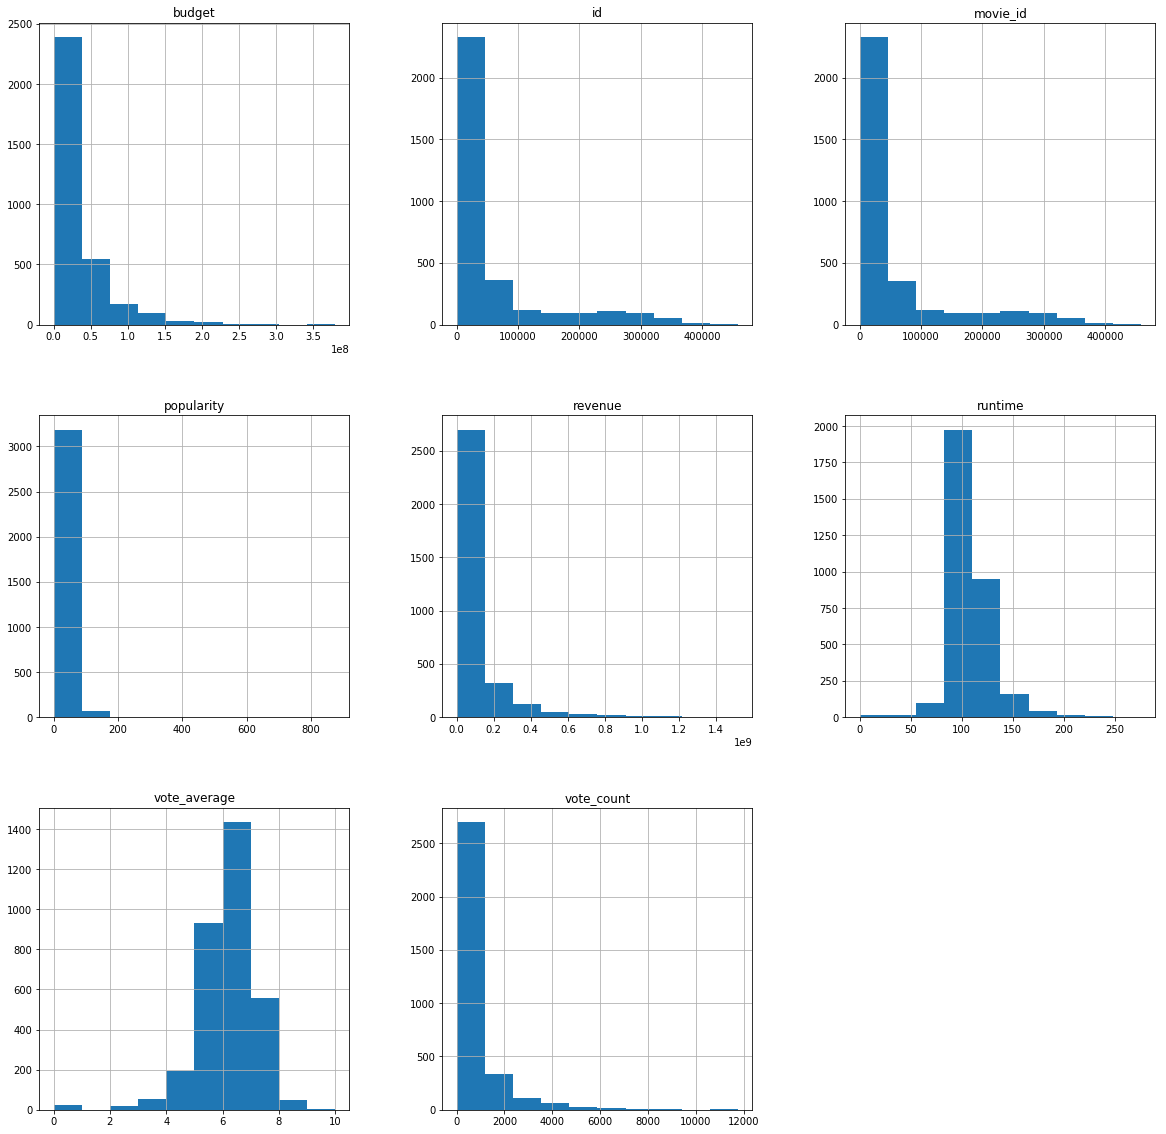

In [41]:
df_new.hist(figsize=(20,20));

# Runtime

We wish to determine if over the years, there is popular movie running duration
Accordingly, we use a histogram to observe the counts of movie runtimes from our new dataset
Maximum counts will reflect the duration that most movies run

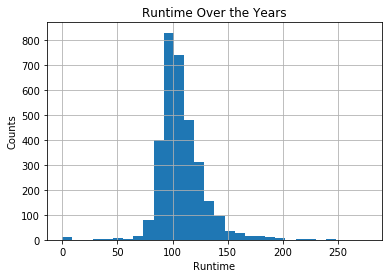

In [45]:

df_new['runtime'].hist(bins=30)
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Runtime Over the Years');

In [23]:
df_new['runtime'].describe()

count    3264.000000
mean      107.672104
std        21.070758
min         0.000000
25%        96.000000
50%       104.500000
75%       117.000000
max       276.000000
Name: runtime, dtype: float64

# Observations about Runtimes:
As seen in the plots and functions above, popular runtimes over the years are between 90 and 100 minutes.
Maximum movies fell in the 107-117 range.
The distribution is right skewed.

# Popularity


We wish to determine if over the years, what is the likely rating a movie will receive
Accordingly, we use a histogram to observe the counts of popularity from our new dataset
Maximum counts will reflect the typical popularity rating of movies

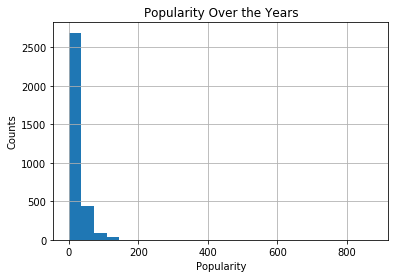

In [55]:
df_new['popularity'].hist(bins=24)
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Popularity Over the Years');

In [26]:
df_new['popularity'].describe()

count    3265.000000
mean       22.531899
std        33.532140
min         0.000372
25%         6.337063
50%        14.745194
75%        28.540267
max       875.581305
Name: popularity, dtype: float64

# Observations about Popularity Ratings:


The distribution is skewed to right.


# Revenue

We wish to determine if over the years, what is the likely revenue a movie will generate
Accordingly, we use a histogram to observe the counts of revenues from our dataset
Maximum counts will reflect the typical revenue earned by movies

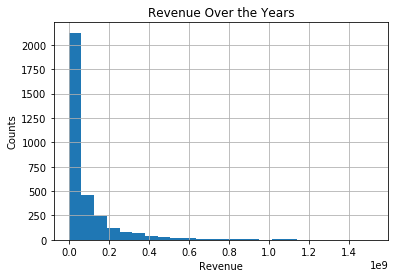

In [28]:
df_new['revenue'].hist(bins=24)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Revenue Over the Years');

In [29]:
df_new['revenue'].describe()

count    3.265000e+03
mean     8.838806e+07
std      1.575828e+08
min      0.000000e+00
25%      8.378530e+05
50%      2.939791e+07
75%      1.028258e+08
max      1.519558e+09
Name: revenue, dtype: float64

# Observations of Revenues:

From the plots and histogram, we can see that:

Distribution is right skewed.
Revenues vary widely.
Most movie revenues fall in the 8.838806e+07 to 1.028258e+08 ranges. `

### Research Question 2 

What are variables that are associated with the revenues of movies spanning over the years? If so, by how much?

In [56]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_new.corr(method='pearson')

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
budget,1.000000,-0.061490,0.479824,0.741718,0.262367,0.076090,0.604238,-0.061553
id,-0.061490,1.000000,0.052663,-0.039284,-0.158207,-0.284500,0.006284,0.999959
popularity,0.479824,0.052663,1.000000,0.622920,0.206758,0.253679,0.758362,0.052593
revenue,0.741718,-0.039284,0.622920,1.000000,0.255656,0.199144,0.787376,-0.039264
runtime,0.262367,-0.158207,0.206758,0.255656,1.000000,0.379182,0.266097,-0.158298
vote_average,0.076090,-0.284500,0.253679,0.199144,0.379182,1.000000,0.312380,-0.284508
vote_count,0.604238,0.006284,0.758362,0.787376,0.266097,0.312380,1.000000,0.006158
movie_id,-0.061553,0.999959,0.052593,-0.039264,-0.158298,-0.284508,0.006158,1.000000


# Revenue vs Popularity:

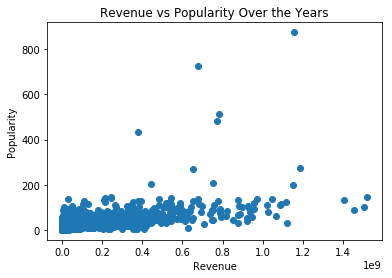

In [57]:
plt.scatter(x=df_new['revenue'], y=df_new['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

# Observations- Revenue vs Popularity:
The correlation computed from function is evident in the scatterplot.
Popularity is proportional to revenues.
The few outliers that grossed medium but were rated extremely high need to be looked into.

# Revenue vs Vote counts:

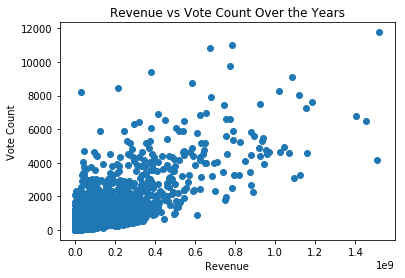

In [60]:
plt.scatter(x=df_new['revenue'], y=df_new['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue vs Vote Count Over the Years');

# Observations- Revenue vs Vote Count:
The correlation computed from function is evident in the scatterplot.
Vote count is roughly proportional to revenues.
Even in this plot, we observe that a few sample had high counts but did not gross commensurately in revenue.
This plot points us to scrutinize the vote counts and type of votes if possible or any other factors influencing voting such as genres, cast, etc.

# Revenue vs Vote averages:

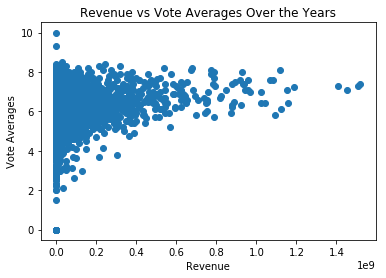

In [59]:
plt.scatter(x=df_new['revenue'], y=df_new['vote_average'])
plt.xlabel('Revenue')
plt.ylabel('Vote Averages')
plt.title('Revenue vs Vote Averages Over the Years');

# Observations- Revenue vs Vote Average:
The correlation computed from function is evident in the scatterplot.
Vote averages are inversely proportional to revenues.
Considering this plot and the previous, we can infer voting variables as influencing revenues. This means that detailed analysis is required to assess the outliers and possibly pursue a detailed line of investigation based on vote counts and averages.

<a id='conclusions'></a>
## Conclusions

From our analysis, we discovered that over the years, there are patterns to runtimes, popularity and revenues.
While only tentative, we have found that popular runtimes range between 90 and 100 minutes.
Revenues showed a wider range, but the most likely range was 8.838806e+07 to 1.028258e+08.
We also analyzed multiple variables. Specifically, we chose to analyze over time [release_date], the effect of particular variables [votes and popularity] on our factor of interest [revenue].
Based on this analysis, we found that over the years, popularity and revenue show a direct relation.
Vote counts and revenue are related positively while vote averages are inversely related to revenues.
However, these relations are merely correlations and do not imply causation.
These lines of analysis point us to the need for further investigation, especially with regards to votes.

# Thank you